## Problem Statement

The HR department of an MNC in New York collects information about their employees. The department records the age, monthly income, total experience and information about the employee's professional work. The department uses this data to find which employees might undergo attrition. There are various factors affecting the attrition of an employee. We can use various dimension reduction techniques to analyze the higher dimensional dataset more effectively. 

##  Data Definition (Employee attrition data)

Here's a brief version of what you'll find in the data

**Age**: Age of the employee

**DailyRate**: Per day rate of the employee

**DistanceFromHome**: Distance between the office and the employee's home 

**HourlyRate**: Per hour rate of the employee

**MonthlyIncome**: Monthly salary of the employee

**MonthlyRate**: Monthly rate of the employee

**NumCompaniesWorked**: Total number of companies in which the employee worked

**PercentSalaryHike**: Percent increase in salary

**TotalWorkingYears**: Total experience (in years)

**TrainingTimesLastYear**: Number of times the employee undergo the training program in the previous year

**YearsAtCompany**: Number of years the employee has worked with the company

**YearsInCurrentRole**: Number of years in the current role

**YearsSinceLastPromotion**: Number of years since the last promotion

**YearsWithCurrManager**: Number of years with the current manager

**Attrition**: Employee leaving the company (1=Yes or 0=No) (target/dependent variable)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Distribution of Variables](#dist)**
    - 2.4 - **[Missing Value Treatment](#null)**
    - 2.5 - **[Scale the Data](#scale)**
3. **[Principal Component Analysis (PCA)](#pca)**
    - 3.1 - **[Covariance Matrix](#cov_mat)**
    - 3.2 - **[Compute Eigenvalues and Eigenvectors](#eigen)**
    - 3.3 - **[Decide Number of Principal Components](#components)**
    - 3.4 - **[Principal Components](#comp)**
    - 3.5 - **[PCA using Python Library](#pcafunction)**
4. **[Linear Discriminant Analysis (LDA)](#lda)**
5. **[Compare the Performance](#perf)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [3]:
# read csv file using pandas
df_attr = pd.read_csv('attrition.csv')

# head() to display top five rows
df_attr.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,53,124,2,38,7525,23537,2,12,30,2,15,7,6,12,0
1,21,337,7,31,2679,4567,1,13,1,3,1,0,1,0,1
2,36,1218,9,82,3407,6986,7,23,10,4,5,3,0,3,1
3,38,1391,10,66,2684,12127,0,17,3,0,2,1,0,2,0
4,24,1476,4,42,4162,15211,1,12,5,3,5,4,0,3,0


#### Compute dimensions of the data

In [4]:
# 'shape' function gives the total number of rows and columns in the data
df_attr.shape

(2233, 15)

**Interpretation**: There are 2233 observations and 15 variables in the dataset.         

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [5]:
# 'dtypes' gives the data type for each column
df_attr.dtypes

Age                        int64
DailyRate                  int64
DistanceFromHome           int64
HourlyRate                 int64
MonthlyIncome              int64
MonthlyRate                int64
NumCompaniesWorked         int64
PercentSalaryHike          int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
Attrition                  int64
dtype: object

**Interpretation**: We can see that the data type of all the variables is as per the data definition.

<a id="dist"></a>
## 2.3 Distribution of Variables

**Distribution of independent variables.**

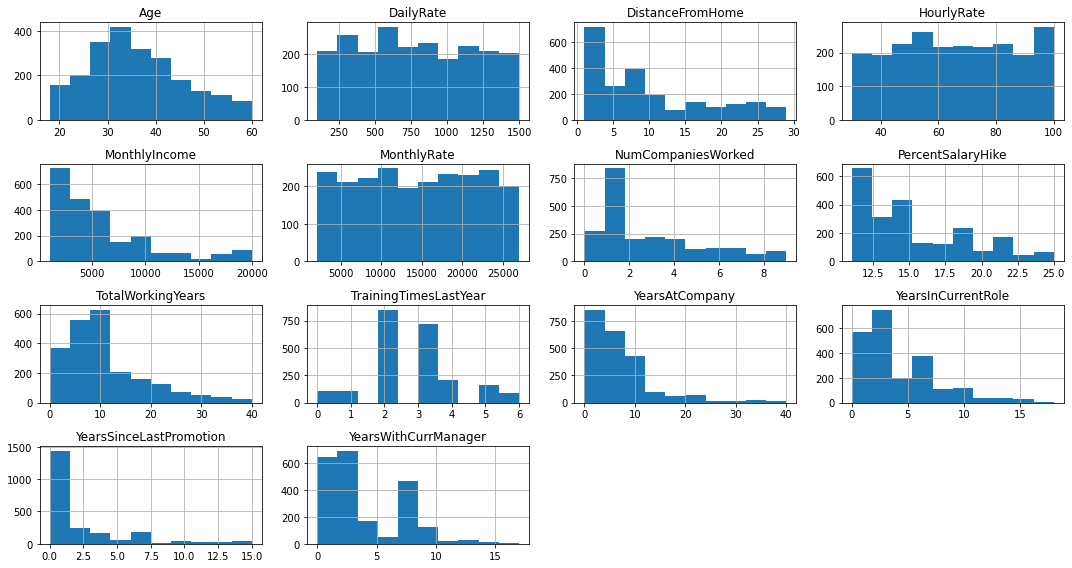

In [6]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using the 'drop()'
# 'axis=1' drops the specified column
df_attr.drop(['Attrition'], axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation**: The above histograms display the distribution of each variable. 

From the plot we can see that the variables `DailyRate`, `HourlyRate` and `MonthlyRate` follow no specific distribution. All the remaining variables are positively distributed.

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [7]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_attr.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_attr.isnull().sum()*100/df_attr.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Attrition,0,0.0
YearsWithCurrManager,0,0.0
YearsSinceLastPromotion,0,0.0
YearsInCurrentRole,0,0.0
YearsAtCompany,0,0.0
TrainingTimesLastYear,0,0.0
TotalWorkingYears,0,0.0
PercentSalaryHike,0,0.0
NumCompaniesWorked,0,0.0
MonthlyRate,0,0.0


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="scale"></a>
## 2.5 Scale the data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [8]:
# standardize all the independent variables 
# we drop the target variable using the 'drop()'
# 'axis=1' drops the specified column
# the 'fit_transform()' transforms the data by first computing the mean and sd and later scaling the data
df_attr_std = StandardScaler().fit_transform(df_attr.drop('Attrition', axis = 1))

# print the dimension of the standardized data
print(df_attr_std.shape)

(2233, 14)


**Interpretation:** Now we use these 14 standardized variables to find the principal components. Now all these variables have mean 0 and their standard deviation is 1.

<a id='pca'></a>
# 3. Principal Component Analysis (PCA)

It is an unsupervised dimension reduction technique used to transform the higher dimensional dataset to a lower dimension. It considers the linear combination of all the numerical variables and create principal components that are orthogonal to each other. These principal components explain most of the variance in the data with lower dimension. 

<a id='cov_mat'></a>
## 3.1 Covariance Matrix

PCA aims to minimize the distortions and to summarize the essential information in the data. These distortions (noise, redundancy, etc.) reflect in the off-diagonal values of the covariance matrix.

In [9]:
# generate the covariance matrix using 'cov' function
# consider the transpose of the dataframe 'df_attr_std' to obtain the covarinace between the independent variables (columns)  
cov_mat = np.cov(df_attr_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00044803  0.00108543 -0.01932118  0.0878637   0.52070041  0.01222788
   0.33604246  0.00204405  0.70266994 -0.016474    0.40437271  0.31282288
   0.28426132  0.28952944]
 [ 0.00108543  1.00044803 -0.04458367  0.03175072  0.0046552  -0.06645707
   0.04615258 -0.0251113   0.00376656 -0.01589741 -0.04716883 -0.00204887
  -0.04038946 -0.0087683 ]
 [-0.01932118 -0.04458367  1.00044803  0.01457042 -0.02010008  0.03498196
  -0.07096223  0.05712164 -0.0178718  -0.03928711 -0.0083611  -0.01374887
  -0.00233438 -0.00999183]
 [ 0.0878637   0.03175072  0.01457042  1.00044803  0.00239115 -0.01897197
   0.02315547 -0.01598421  0.03058398 -0.00866239  0.01403102 -0.02585746
  -0.03357082 -0.00111668]
 [ 0.52070041  0.0046552  -0.02010008  0.00239115  1.00044803  0.05210244
   0.16559791 -0.03711425  0.76515409 -0.02448325  0.56170029  0.44724512
   0.37540876  0.39924222]]


**Interpretation:** The covariance matrix is a square matrix of dimension 14x14. The diagonal entries correspond to the variance of each variable (which is always equal to 1, as we are using the standardized data) and the off-diagonal entries represent the covariances between the variables.

<a id='eigen'></a>
## 3.2 Compute Eigenvalues and Eigenvectors 

Eigenvalues: The diagonal values of the diagonalized covariance matrix are the `eigenvalues` of the covariance matrix. Large eigenvalues correspond to the large variance in the data.<br>
                        
Eigenvectors: The eigenvectors corresponds to the eigenvalues give directions of the maximum variation in the data.

In [10]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.30567107 1.51892139 0.12679687 0.21619259 0.25285258 0.43403018
 0.47151197 0.68139318 1.1302603  1.04197238 1.01182564 0.99398062
 0.90451699 0.91634664] 

Eigenvectors: 
 
 [[ 3.04538423e-01  4.33467401e-01  2.16389939e-01 -2.32422825e-01
   5.27258977e-02 -7.21834470e-01 -1.73778426e-01  1.54259496e-01
   3.57778059e-02  5.34637444e-02 -1.74706496e-01 -2.04540317e-02
   7.48105629e-02  4.65383830e-03]
 [-8.82696560e-03  1.06285227e-01  2.39597537e-02  3.10596944e-02
  -1.14639536e-02 -2.33973997e-02 -5.72006637e-02 -4.37585287e-03
  -5.17585850e-01  3.08134801e-01  3.06870579e-01 -1.76725099e-01
  -2.39736318e-01  6.61362120e-01]
 [-1.19613397e-02 -9.31137661e-02  7.33407591e-03 -6.05141634e-03
   2.30861730e-03  1.93211915e-02  3.15858788e-02 -1.21675996e-01
   5.19834783e-01  4.58164003e-01  1.57959385e-02  1.48355278e-01
   5.31564772e-01  4.35835552e-01]
 [ 7.88568842e-03  1.42351598e-01 -1.93747218e-02 -1.54229726e-02
   1.71074236e-02  1.03145000e-01 -1.887

**Interpretation:** For the 14x14 covariance matrix, we get 14 eigenvalues and eigenvectors. The eigenvector corresponding to the largest eigenvalue represent the direction of the highest variation in the dataset.

<a id='components'></a>
## 3.3 Decide Number of Principal Components

In [11]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[4.305671065115176, 1.5189213881051118, 1.1302602977102152, 1.0419723832167636, 1.011825636114389, 0.9939806181788776, 0.91634664473653, 0.9045169863191345, 0.6813931814875855, 0.47151197140316276, 0.43403018385256464, 0.2528525824213316, 0.21619259342659308, 0.1267968693462527]


To decide the number of components, we can use different methods as: `Kaiser criterion`, `Scree plot`, `Percentage of Explained Variation`.

#### 1) Kaiser criterion: This criterion considers the number of pricipal components for which the eigenvalue is greater than 1. This criterion suffers a drawback of selecting more number of components as the eigenvalues very close to 1 may not contribute significantly in explaining the variation in the data.

Here the first five eigenvalues are greater than 1. Thus we can consider 5 principal components using kaiser criterion.

#### 2) Scree plot: Plot the eigenvalues and choose the number of components corresponding to the elbow point.

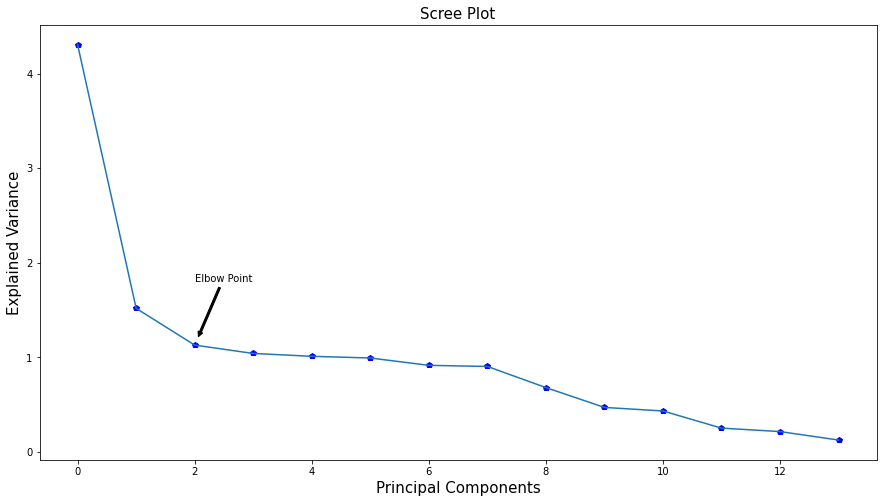

In [12]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# display the plot
plt.show()   

**Interpretation**: It can be observed that, after the elbow point, the principal components do not contribute much to the variance in the data. 
The Kaiser criterion considers the number of principal components as 5, but the scree plot shows that only first three components explains most of the variation.

#### 3) Percentage of Explained Variation: Calculate the percentage of variation explained by each principal component. We consider the number of components that explain most of the variation.

The eigenvalue represents the total variance explained by that principal component. 

The proportion of variation explained by the i<sup>th</sup> principal component is calculated by taking the ratio of i<sup>th</sup> eigenvalue to the sum of all the eigenvalues. To calculate the percentage, multiply this ratio by 100.

In [13]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[30.741020463620615,
 10.844579803757313,
 8.069672396165316,
 7.439326848377638,
 7.2240893730641575,
 7.09668204137693,
 6.542401993000883,
 6.45794227325286,
 4.864914532276539,
 3.366434393742754,
 3.098827235490131,
 1.8052810567603235,
 1.5435412594464717,
 0.9052863296680832]

**Interpretation**: It can be seen that the first principal component explains 30.7% variation in the data.

Now calculate the cumulative percentage of variation.

In [14]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 30.74102046,  41.58560027,  49.65527266,  57.09459951,
        64.31868888,  71.41537093,  77.95777292,  84.41571519,
        89.28062972,  92.64706412,  95.74589135,  97.55117241,
        99.09471367, 100.        ])

**Interpretation**: We can see that the first five components explain approximately 64% of the variation in the data. By considering the 3 components as per the scree plot, the components explain approximately 50% of the variation. To explain 95% of the variation in the data, we need to consider ten principal components.

For this dataset, let us choose the `five` principal components that explain 64% of the variation.

Thus, we take the dot product of the scaled data and the eigenvectors corresponding to the first five eigenvalues to get the principal components. 

<a id='comp'></a>
## 3.4 Principal Components 

In [15]:
# consider the eigenvectors corresponding to the first five highest eigenvalues
# these eigenvectors are the 1st, 2nd, 9th, 10th and 11th columns of 'eig_vec' 
eigenvector = eig_vec[:,[0,1,8,9,10]]

# print the vectors
eigenvector

array([[ 3.04538423e-01,  4.33467401e-01,  3.57778059e-02,
         5.34637444e-02, -1.74706496e-01],
       [-8.82696560e-03,  1.06285227e-01, -5.17585850e-01,
         3.08134801e-01,  3.06870579e-01],
       [-1.19613397e-02, -9.31137661e-02,  5.19834783e-01,
         4.58164003e-01,  1.57959385e-02],
       [ 7.88568842e-03,  1.42351598e-01, -1.39495189e-01,
         5.55285540e-01, -1.88153141e-01],
       [ 3.58682890e-01,  2.33112557e-01,  6.36529016e-02,
        -5.82288560e-02, -6.66363162e-02],
       [-1.26919971e-02,  1.34952748e-01,  5.28570097e-01,
        -3.60495333e-01,  1.22125474e-01],
       [ 6.93976618e-02,  6.10804377e-01, -3.40814631e-02,
        -5.02895800e-02,  4.63664775e-02],
       [-2.04835654e-02, -5.14656975e-02,  3.13414736e-01,
         4.24058560e-01, -3.57735271e-01],
       [ 4.14632329e-01,  2.65210204e-01,  2.71999133e-02,
        -1.41815955e-03, -7.80306663e-02],
       [-1.47517980e-02, -1.31453831e-01, -2.34271801e-01,
        -2.52928103e-01

**Interpretation**: The first column in the above output represents the direction of maximum variation in the data. The second column represents the direction of the 2nd most highest variation in the data and so on.

Now generate a new dataset of reduced dimensions by multiplying standardize data and set of eigenvectors.

In [16]:
# take the dot product of 'df_attr_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(df_attr_std.dot(eigenvector), columns= ['PC1','PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,3.905466,-0.095954,1.117870,-2.186599,0.477868
1,-2.558738,-1.250848,-0.352867,-1.301638,0.035775
2,-0.654722,1.059780,-0.935477,1.738105,-1.478593
3,-1.676318,0.024093,-0.285561,1.466101,1.850465
4,-1.242807,-0.865700,-1.424404,-0.868779,1.083326


In [17]:
# check the shape of the transformed data
df_pca.shape

(2233, 5)

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2233 observations and 5 columns, i.e. we have decreased the number of features from 14 to 5.

Now, we use the in-built python function `PCA()` from the sci-kit learn library to calculate the principal components.

<a id='pcafunction'></a>
## 3.5. PCA using Python Library 

Use the in-built PCA function from the sklearn library to perform PCA and check the results with the obtained data with reduced dimensions (using scratch method). We consider number of components = 5.

In [18]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 5, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df_attr_std)

In [19]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

,PC1,PC2,PC3,PC4,PC5
0,3.905466,-0.095954,1.117870,-2.186599,-0.477868
1,-2.558738,-1.250848,-0.352867,-1.301638,-0.035775
2,-0.654722,1.059780,-0.935477,1.738105,1.478593
3,-1.676318,0.024093,-0.285561,1.466101,-1.850465
4,-1.242807,-0.865700,-1.424404,-0.868779,-1.083326


In [20]:
# check the shpe of the new dataset
df_pca_sklearn.shape

(2233, 5)

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2233 observations and 5 columns. 

The above dataframe shows that, the sign of the fifth principal component is reversed in the output obtained from the in-built function, as compared to the results obtained from scratch.

The signs depend on how the algorithm solves the eigenvector problem underlying the PCA operation. The scratch method is using the eigendecomposition method to compute eigenvalues and eigenvectors; while in-built function uses the SVD method.
The difference in the signs does not affect the variances explained by the principal components. Let, PC1 be the component of maximum variation. If we consider -(PC1) instead of PC1, then also we obtain the same variation in the data.

#### Find the loadings of the principal components

In [21]:
# the 'components_' returns the loading for each principal component
pca.components_

array([[ 3.04538423e-01, -8.82696560e-03, -1.19613397e-02,
         7.88568842e-03,  3.58682890e-01, -1.26919971e-02,
         6.93976618e-02, -2.04835654e-02,  4.14632329e-01,
        -1.47517980e-02,  4.30605278e-01,  3.92877911e-01,
         3.43813067e-01,  3.77894289e-01],
       [ 4.33467401e-01,  1.06285227e-01, -9.31137661e-02,
         1.42351598e-01,  2.33112557e-01,  1.34952748e-01,
         6.10804377e-01, -5.14656975e-02,  2.65210204e-01,
        -1.31453831e-01, -2.00049250e-01, -2.57606707e-01,
        -2.17876333e-01, -2.86571670e-01],
       [ 3.57778059e-02, -5.17585850e-01,  5.19834783e-01,
        -1.39495189e-01,  6.36529016e-02,  5.28570097e-01,
        -3.40814631e-02,  3.13414736e-01,  2.71999133e-02,
        -2.34271801e-01, -1.18793575e-02, -2.62040956e-02,
         4.09961292e-03, -4.29144733e-02],
       [ 5.34637444e-02,  3.08134801e-01,  4.58164003e-01,
         5.55285540e-01, -5.82288560e-02, -3.60495333e-01,
        -5.02895800e-02,  4.24058560e-01, -1.

**Interpretation**: Each row in the above array represents the loadings for the principal components.

<a id='lda'></a>
# 4. Linear Discriminant Analysis (LDA)

LDA is one of the dimension reduction techniques which is a supervised algorithm as it takes the labels of the target/ dependent variable into consideration. This method reduces dimensionality of the data and also at the same time preserves as much of the class discrimination information as possible. 

We project the original data onto the lower dimensional vectors and calculate the linear discriminants that returns maximum separation between the classes of the target vraiable.

In [22]:
# consider the target variable
df_target = df_attr['Attrition']

# check the unique classes in the target variable
df_target.unique()

array([0, 1], dtype=int64)

**Interpretation**: The output shows that, there are two classes in the target variable.

Thus, we project the data on a 1-D line that can maximize the separation between these two classes.

In [23]:
# instantiate the LDA
# here we have 2 classes in target variable, thus we choose n_components as 2 - 1 = 1
lda = LDA(n_components=1)

# fit_transform() computes the linear discriminants on the given data 
# pass the standardized data of independent variables to the parameter 'X'
# pass the target variable to the parameter 'y'
discriminant = lda.fit_transform(X = df_attr_std, y = df_target)

In [24]:
# create a dataframe of linear discriminant
# pass the required column names to the parameter 'columns'
df_lda = pd.DataFrame(data = discriminant, columns = ['LD1'])

# head() to display top five rows of the transformed data
df_lda.head()

,LD1
0,1.185875
1,-1.394706
2,0.037103
3,-0.002582
4,0.394587


In [25]:
# check the shape of the transformed data
discriminant.shape

(2233, 1)

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2233 observations and 1 columns. 

<a id='perf'></a>
# 5. Compare the Performance

#### We will compare the model performance of the decision tree algorithm on the original dataset and the transformed data obtained by PCA and LDA.

Let us split the dataset into train and test sets and perform PCA and LDA to transform the train and test sets. Use the transformed train-test sets to compute the accuracy of the model.

In [26]:
# consider the independent variables
# convert the standardized array of the dataest to the dataframe
X = pd.DataFrame(df_attr_std)

# consider the target variable
y = df_target

In [27]:
# split the original dataset into train and test set
# pass the independent and dependent variables
# pass the required proportion of the test set to the parameter 'test_size'
# pass the 'random_state' to obtain the same sets for multiple code runs
# pass the target variable to the parameter 'stratify', to obtain the balance of target labels in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

Now let us fit the PCA on the train set and transform the train and test sets accordingly. We compute the 5 principal components.

In [28]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 5, random_state = 10)

# fit the PCA on train set
# the 'transform()' computes the principal components 
# pass the train data to transform the train and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Now let us fit the LDA on the train set and transform the train and test sets accordingly.

In [29]:
# instantiate the LDA
# here we have 2 classes in target variable, thus we choose n_components as 2 - 1 = 1
lda = LDA(n_components = 1)

# fit the LDA on train set
# the 'transform()' computes the linear discriminants 
# pass the train data to transform the train and test sets
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

#### Let us create a function that runs the decision tree algorithm and finds the accuracy on the test set. 

In [30]:
# define a function to build a decision tree model and calculate the accuracy on the test set
# pass the train and test sets as the 
def decisiontree_model_run(X_train, X_test, y_train, y_test):
    
    # create a decision tree classifier object
    # use 'random_state' to obtain the same results for multiple code runs
    df_tree = DecisionTreeClassifier(random_state=10)
    
    # fit the decision tree model on the train set
    df_tree.fit(X_train, y_train)
    
    # predict the target class for test set
    y_pred = df_tree.predict(X_test)
    
    # print the accuracy score
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

#### Run the decision tree classifier on the original data

In [31]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the original data
decisiontree_model_run(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.8993288590604027
Wall time: 14.6 ms


#### Run the decision tree classifier after performing the PCA on the data

In [32]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the PCA transformed data
decisiontree_model_run(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.883668903803132
Wall time: 11.2 ms


#### Run the decision tree classifier after performing the LDA on the data

In [33]:
%%time
# '%%time' returns the time required for the execution of the model

# pass the train and test set of the LDA transformed data
decisiontree_model_run(X_train_lda, X_test_lda, y_train, y_test)

Accuracy on test set: 
0.8993288590604027
Wall time: 4.73 ms


**Interpretation:** From the above results, we can see that the model accuracy for the LDA transformed dataset is the same as the original dataset, but the time taken by the LDA is the least. PCA transformed data also took less time to build the model than the original dataset since; the number of features is reduced; but, the accuracy is decreased due to the information loss.